In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("bank_churn.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df['Gender'] = 1 if 'male' else 0

In [17]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f'{col}::{df[col].unique()}')

Geography::['France' 'Spain' 'Germany']


In [26]:
#one hot encoding
df1 = pd.get_dummies(df,columns=['Geography'])
# df1.dtypes,df1

In [27]:
#Scaling
columns_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [30]:
x = df1.drop('Exited',axis='columns')
y = df1.Exited

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5,test_size=0.2)

In [33]:
x_train.shape

(8000, 12)

ANN Model

In [32]:
import tensorflow
from tensorflow import keras

In [48]:
model = keras.Sequential([
    keras.Input(shape=(12,)),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
            metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4981 - accuracy: 0.7934
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8077
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8134
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8179
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8186
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8229
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8279
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8316
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8321
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4058 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8645
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8654
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8634
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8649
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8633
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8650
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8637
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8639
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8650
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 

In [50]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8545


[0.3607996106147766, 0.8544999957084656]

In [51]:
y_p = model.predict(x_test)
y_pred = []
for element in y_p:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 927us/step


In [52]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.48      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

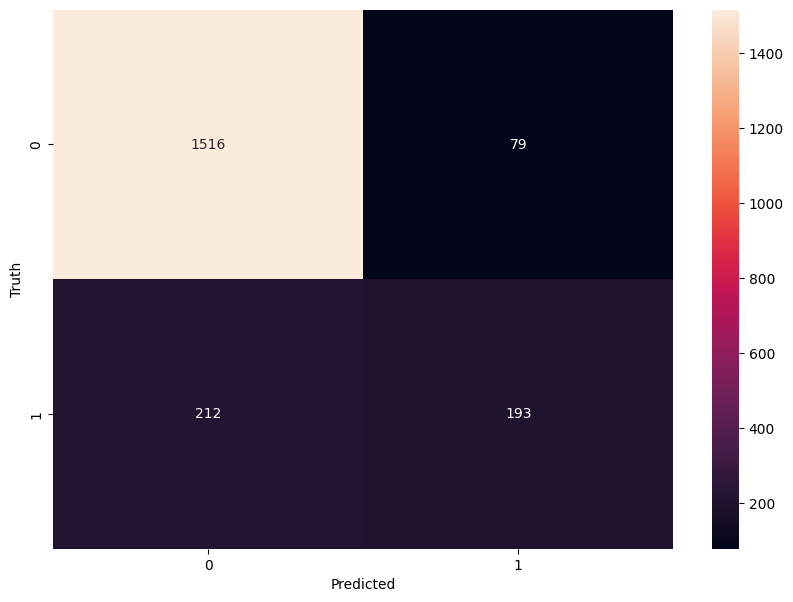

In [53]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")